In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
import sys
import os
import matplotlib as mpl
import re
import glob
os.chdir('C:\\Users\\chami\\Desktop\\NF\\Polymer_params_final\\OEG-mixed-chains_full_code')
pwd=os.getcwd()

Scope of this code is to model random copolymers. Charge distributions can also be modified so that neutral and charged (polaronic) sites can be represented

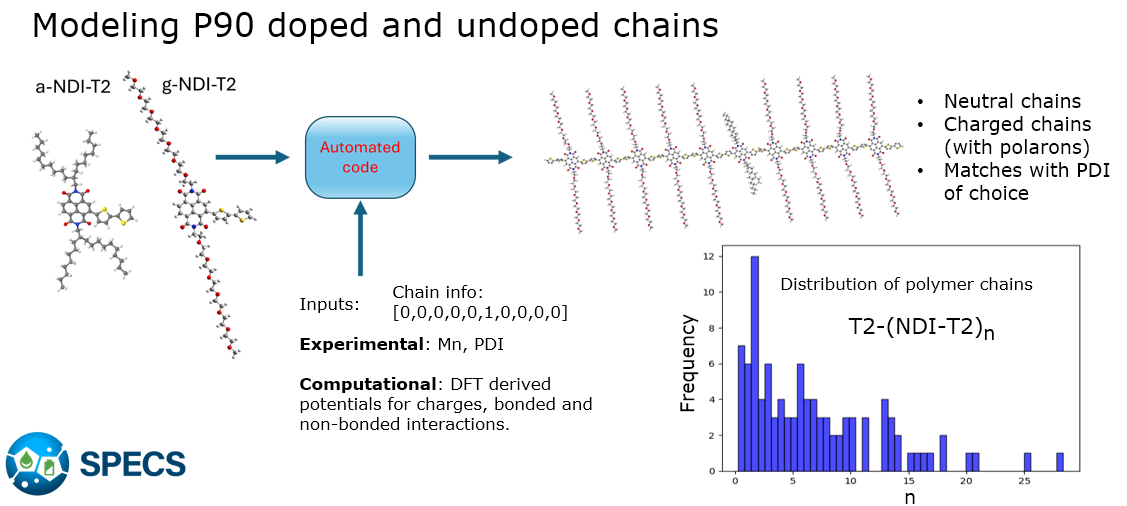

In [2]:
#initialize chain
chain = [0,0,0,0,0,1,0,0,0,0] # 1 for PEG 0 for alkyl, also determines the length of the polymer
output_itp = 'Outputs/PEG_nmer_mixedchain.itp'
chain_string = 'PEG'

#gro file INPUTS
grofile1 = 'Inputs/N2200_mon.gro'
grofile2 = 'Inputs/P-frag-unit.gro'
outfile = 'Outputs/PEG_nmer_mixedchain.gro'

X, Y, Z = -1.46, 0.000, 0.000 #dont change for Form I N2200
#this is the spacing between two repeat units. If your chains extend along x axis, only x axis will have a spacing

For monomer group a and b, make sure numbering star (A) and end (Z) with terminal H atoms, as shown below. Hook A and Z are the immediate connections to A and Z
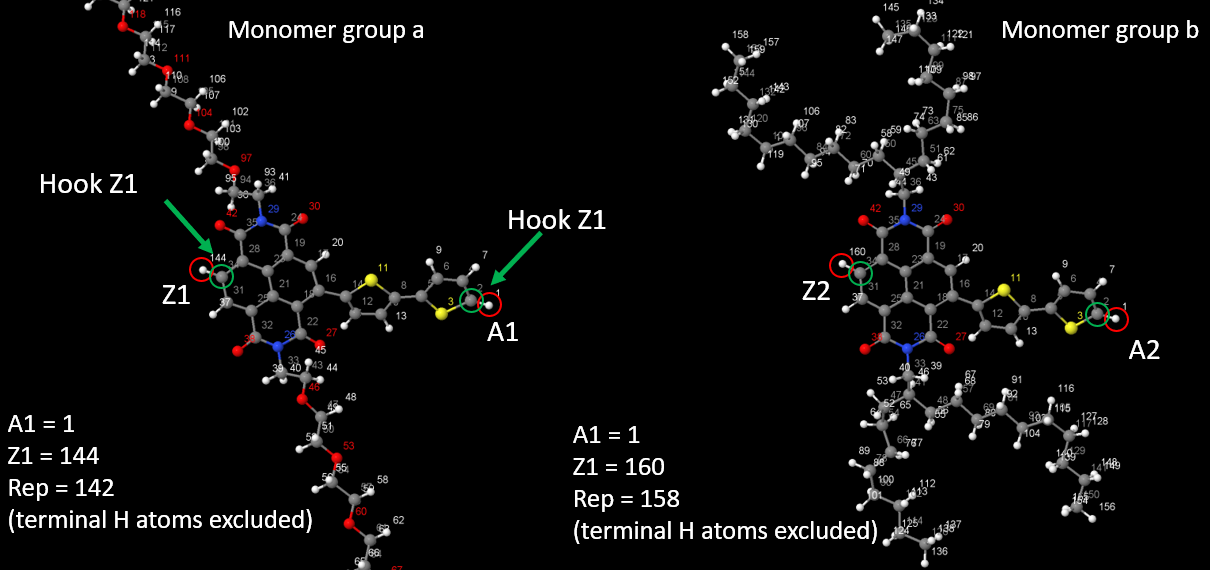

In [3]:
# Define inputs1 - specific to PEG-N2200 (or type 'a')
itpfile1 = 'Inputs/OEG_monomer.itp' 

#Bonds
#    A-=====-Z

A1 = 1   #start H
Z1 = 144 #end H
rep1=142
Hook_A1 = 2 
Hook_Z1 = 34
force_const = [1, 0.1464, 322168.000] #between C-C conjugated bridging bond 
force_const_terminal = [1, 0.1080,307105.600] #between C-H terminal bond

linkerbonds = [Z1, Hook_Z1,force_const[0], force_const[1],force_const[2]]

#Angles 

# define all 4 angles between two units of a dimer - orient your molecule consistently thorughout following the template
'''
##On-site##
 up         up
   \       /
     Z - A   
   /       \
down       down

##Linker###  these are inter group connections, note that Hook_Z of one unit connected to Hook_A of the next unit 
 up               up
   \             /
    Hook_A - Hook_Z  
   /             \
down              down
    '''

#this results in 4 dihedral positions
#    up-Z-A
#    Down-Z-A
#    Z-A-up
#    Z-A-down

linkeralup1 = [146, Z1, Hook_Z1, 1, 127.37, 585.760] #left up
linkeraldown1 = [145, Z1, Hook_Z1, 1, 122.62, 585.760] #left down S containing
linkerarup1 = [28, Hook_Z1, Z1, 1, 122.48, 527.184] #right up
linkerardown1 = [31, Hook_Z1, Z1, 1, 118.69, 537.811] #right down

#define 2 angles between end unit and terminal H - CAUTION - note that these two angles are in this order, other two is absent
AngH_31 = np.array([Z1, Hook_Z1, 28]) #left up
AngH_cons31 = [1, 122.260, 502.080]
AngH_41 = np.array([145, Z1, Hook_Z1]) #left up
AngH_cons41 = [1, 122.260, 502.080]

#Dihedrals - Linkers in propers-----------------------------------------------------
dihed_11 = np.array([146, Z1, Hook_Z1, 28]) #from left up up
dihed_cons11 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
dihed_21 = np.array([145, Z1, Hook_Z1, 28]) #from left down up 
dihed_cons21 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000] 
dihed_31 = np.array([146, Z1, Hook_Z1, 31]) #from left up down 
dihed_cons31 = [3, 1.3034, -4.3954, -21.2755, -11.9985, 13.7856, 12.7423] #- EXPLICITLY CALCULATED
dihed_41 = np.array([145, Z1, Hook_Z1, 31]) #from left down down
dihed_cons41 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
                
# in ring propers - left
Dihed_11 = np.array([Z1, Hook_Z1, 28 , 35]) #from left up up
Dihed_cons11 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_21 = np.array([Z1, Hook_Z1, 28 , 23]) #from left down up
Dihed_cons21 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_31 = np.array([Z1, Hook_Z1, 31, 37]) #from left up down
Dihed_cons31 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_41 = np.array([Z1, Hook_Z1, 31, 25]) #from left down down
Dihed_cons41 = [3, 9.079, 0.000, -9.079, -0.000, -0.000, 0.000]

#in ring proper - right - only 3 because of thiophene group
Dihed_111 = np.array([Hook_Z1, Z1, 146, 164]) #from left up up
Dihed_cons111 = [3, 9.079, 0.000, -9.079, -0.000, -0.000, 0.000]
Dihed_221 = np.array([Hook_Z1, Z1, 146, 149]) #from left down up
Dihed_cons221 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_331 = np.array([Hook_Z1, Z1, 145, 147]) #from left up down
Dihed_cons331 = [3,  0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
#------------------------------------------------------------------------

#Dihedrals - Impropers
dihedI_11 = np.array([146, Z1, Hook_Z1, 145]) #left atom centered 
dihedI_cons11 = [4, 180.000, 10.460,  2] #thiophene side
dihedI_21 = np.array([Z1, Hook_Z1, 28, 31]) #right atom centered
dihedI_cons21 = [4, 180.000, 10.460,  2] #thophene side

#INPUTS END

In [4]:
# Define inputs1 - specific to alkylated-N2200 (or type 'b')
itpfile2 = 'Inputs/N2200_monomer.itp'  #from N2200_monomer_CK_updated_newparams_cleaned.itp 
#trimer_log = 'Trimer_pop_cm5.log'

#Bonds
#    A-=====-Z

A2 = 1   #start H
Z2 = 160 #end H
rep2=158
Hook_A2 = 2 
Hook_Z2 = 34
force_const = [1, 0.1464, 322168.000] #between C-C conjugated bridging bond 
force_const_terminal = [1, 0.1080,307105.600] #between C-H terminal bond

linkerbonds = [Z2, Hook_Z2,force_const[0], force_const[1],force_const[2]]

linkeralup2 = [162, Z2, Hook_Z2, 1, 127.37, 585.760] #left up
linkeraldown2 = [161, Z2, Hook_Z2, 1, 122.62, 585.760] #left down S containing
linkerarup2 = [28, Hook_Z2, Z2, 1, 122.48, 527.184] #right up
linkerardown2 = [31, Hook_Z2, Z2, 1, 118.69, 537.811] #right down

#define 2 angles between end unit and terminal H - CAUTION - note that these two angles are in this order, other two is absent
AngH_32 = np.array([Z2, Hook_Z2, 28]) #left up
AngH_cons32 = [1, 122.260, 502.080]
AngH_42 = np.array([161, Z2, Hook_Z2]) #left up
AngH_cons42 = [1, 122.260, 502.080]

#Dihedrals - Linkers in propers-----------------------------------------------------
dihed_12 = np.array([162, Z2, Hook_Z2, 28]) #from left up up
dihed_cons12 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
dihed_22 = np.array([161, Z2, Hook_Z2, 28]) #from left down up 
dihed_cons22 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000] 
dihed_32 = np.array([162, Z2, Hook_Z2, 31]) #from left up down 
dihed_cons32 = [3, 1.3034, -4.3954, -21.2755, -11.9985, 13.7856, 12.7423] #- EXPLICITLY CALCULATED
dihed_42 = np.array([161, Z2, Hook_Z2, 31]) #from left down down
dihed_cons42 = [3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
                
# in ring propers - left
Dihed_12 = np.array([Z2, Hook_Z2, 28 , 35]) #from left up up
Dihed_cons12 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_22 = np.array([Z2, Hook_Z2, 28 , 23]) #from left down up
Dihed_cons22 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_32 = np.array([Z2, Hook_Z2, 31, 37]) #from left up down
Dihed_cons32 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_42 = np.array([Z2, Hook_Z2, 31, 25]) #from left down down
Dihed_cons42 = [3, 9.079, 0.000, -9.079, -0.000, -0.000, 0.000]

#in ring proper - right - only 3 because of thiophene group
Dihed_112 = np.array([Hook_Z2, Z2, 162, 164]) #from left up up
Dihed_cons112 = [3, 9.079, 0.000, -9.079, -0.000, -0.000, 0.000]
Dihed_222 = np.array([Hook_Z2, Z2, 162, 165]) #from left down up
Dihed_cons222 = [3, 30.334, 0.000, -30.334, -0.000, -0.000, 0.000]
Dihed_332 = np.array([Hook_Z2, Z2, 161, 163]) #from left up down
Dihed_cons332 = [3,  0.000, 0.000, 0.000, -0.000, -0.000, 0.000]
#------------------------------------------------------------------------

#Dihedrals - Impropers
dihedI_12 = np.array([162, Z2, Hook_Z2, 161]) #left atom centered 
dihedI_cons12 = [4, 180.000, 10.460,  2] #thiphene side
dihedI_22 = np.array([Z2, Hook_Z2, 28, 31]) #right atom centered
dihedI_cons22 = [4, 180.000, 10.460,  2]

#INPUTS END

In [5]:
#0. Generate GRO file

with open(grofile1, "r") as gro1:
    allines1 = gro1.readlines()
grodirective1 = []
gro1.close()
for line in allines1:
    grodirective1.append(line.split())
grodirective_df1 = pd.DataFrame(grodirective1[2:-1]) # skip header lines and

with open(grofile2, "r") as gro2:
    allines2 = gro2.readlines()
grodirective2 = []
gro2.close()
for line in allines2:
    grodirective2.append(line.split())
grodirective_df2 = pd.DataFrame(grodirective2[2:-1]) # skip header lines and

bith_termer = grodirective_df1.copy().iloc[1:16,:]

nonmer1 = grodirective_df1.iloc[1:-1]
nonmer2 = grodirective_df2.iloc[1:-1]

#first monomer unit           monomer1 -  H 
if chain[0] == 0:
    polychain = grodirective_df1.iloc[:-1]
elif chain[0] == 1:
    polychain = grodirective_df2.iloc[:-1]

def printchain(polymer):
    polymer.iloc[:,0] = "1PEG"
    polymer.iloc[:,3:] = polymer.iloc[:,3:].astype(float)
    grofile = open(outfile, 'w+')  # open file handler for writing
    print('polymer gro file generated by polyGROgen | ChamikaraK', file=grofile)
    print('  '+(str(polymer.shape[0])), file=grofile)
    for i in range(polymer.shape[0]):
        coord_string = "{}{}{}".format(format(polymer.iloc[i,3],"8.3f"), format(polymer.iloc[i,4],"8.3f"), format(polymer.iloc[i,5],"8.3f"))
        site_string = "{0:>8s}{1:>7s}{2:>5s}{3}".format(polymer.iloc[i,0], polymer.iloc[i,1], polymer.iloc[i,2],str(coord_string))
        print(site_string, file=grofile)
    print('   10   10   10', file=grofile)
    grofile.close()

chain_stitch = polychain.copy()
for i in range(1,len(chain)):
    nonmer1.iloc[:,3] = nonmer1.iloc[:,3].astype(float) +X
    nonmer2.iloc[:,3] = nonmer2.iloc[:,3].astype(float) +X
    if chain[i] == 0:   
        chain_stitch = pd.concat([chain_stitch, nonmer1])
    elif chain[i] == 1: 
        chain_stitch = pd.concat([chain_stitch, nonmer2])

bith_termer.iloc[:,3] = bith_termer.iloc[:,3].astype(float)+X*(len(chain))
bith_termer.iloc[-1,1] = "H4I"

polymer = pd.concat([chain_stitch, bith_termer])
polymer.iloc[:,2] = pd.DataFrame([range(1,polymer.shape[0]+1)]).T #fix atom numbering#
polymer.iloc[:,2] = polymer.iloc[:,2].astype(str)
printchain(polymer)

In [6]:
#Define directories
typesdir = "[ atomtypes ]"
moleculetypes = "[ moleculetype ]"
atomsdir = "[ atoms ]"
bondsdir = "[ bonds ]"
anglesdir = "[ angles ]"
dihedralsdir = "[ dihedrals ]"
dihedralsdir_improper = "; IMPROPER DIHEDRAL ANGLES"
dihedralsdir_proper = "; PROPER DIHEDRAL ANGLES"
pairsdir = "[ pairs ]"

#1. read itp save upto bonds directive save to new file
with open(itpfile1, "r") as itp1:
    allines1 = itp1.readlines()
with open(itpfile2, "r") as itp2:
    allines2 = itp2.readlines()

In [7]:
#1. Types directive - combine all unique atom types from both itps
typesdirective1 = []
printgo, printgo2 = False, False
for line in allines1:  # search for start end line
    if typesdir in line:
        printgo = True
        printgo = False
    if printgo:
        typesdirective1.append(line)
typesdirective2 = []
printgo, printgo2 = False, False
for line in allines2:  # search for start end line
    if typesdir in line:
        printgo = True
    if moleculetypes in line:
        printgo = False
    if printgo:
        typesdirective2.append(line)

merged_typesdirective = list(dict.fromkeys(typesdirective1 + typesdirective2))
merged_typesdirective.append('[ moleculetype ]\n')
merged_typesdirective.append('; Name               nrexcl\n')
merged_typesdirective.append(f'{chain_string}                   3\n\n')
# Add line numbers to each line in merged_typesdirective

with open ('1_Types_test.txt', 'w') as file:
    for line in merged_typesdirective:
        file.write(line)

In [8]:
#2. Atoms directive
atomsdirective1 = []
atomsdirective2 = []

printgo, printgo2 = False, False
for line in allines1:  # search for start end line
    if atomsdir in line:
        printgo = True
    if bondsdir in line:
        printgo = False
    if printgo:
        atomsdirective1.append(line.split())

printgo, printgo2 = False, False
for line in allines2:  # search for start end line
    if atomsdir in line:
        printgo = True
    if bondsdir in line:
        printgo = False
    if printgo:
        atomsdirective2.append(line.split())    
            
atomsdirective_df1 = pd.DataFrame(atomsdirective1[2:]) # skip header lines and 
atoms_starter_df1 = atomsdirective_df1.iloc[:,1:] #remove index and remove terminating H !!!!!assume term H is last line
atoms_starter_df1.index = (range(1,atomsdirective_df1.shape[0]+1))
atoms_starter_df1
atomsdirective_df2 = pd.DataFrame(atomsdirective2[2:]) # skip header lines and 
atoms_starter_df2 = atomsdirective_df2.iloc[:,1:] #remove index and remove terminating H !!!!!assume term H is last line
atoms_starter_df2.index = (range(1,atomsdirective_df2.shape[0]+1))
atoms_starter_df1

stitchatoms_dir = pd.DataFrame()
for i in range(len(chain)):
    if i == 0:
        if chain[i] == 1:
            stitchatoms_dir = pd.concat([stitchatoms_dir, atoms_starter_df1.iloc[:-1,:]], ignore_index=True)
        if chain[i] == 0:
            stitchatoms_dir = pd.concat([stitchatoms_dir, atoms_starter_df2.iloc[:-1,:]], ignore_index=True)
    else:
        if chain[i] == 1:
            stitchatoms_dir = pd.concat([stitchatoms_dir, atoms_starter_df1.iloc[1:-1,:]], ignore_index=True)
        if chain[i] == 0:
            stitchatoms_dir = pd.concat([stitchatoms_dir, atoms_starter_df2.iloc[1:-1,:]], ignore_index=True)
stitchatoms_dir = pd.concat([stitchatoms_dir, atoms_starter_df1.iloc[1:15,:]], ignore_index=True) #add last biTh group
stitchatoms_dir = pd.concat([stitchatoms_dir, atoms_starter_df1.iloc[[0]]], ignore_index=True) #add terminating H
stitchatoms_dir.iloc[:,2] = chain_string
stitchatoms_dir.insert(0, 'Line', range(1, len(stitchatoms_dir) + 1))
stitchatoms_dir.to_csv('2_Atoms_test.txt', sep='\t', index=False, header=False)

In [9]:
stitchatoms_dir.iloc[:,7].astype(float).sum()
stitchatoms_dir.shape

(1580, 8)

In [10]:
#3. Bonds directive
directive1 = []
printgo, printgo2 = False, False
for line in allines1:
    if bondsdir in line:
        printgo = True
    if anglesdir in line:
        printgo = False
    if printgo:
        directive1.append(line.split())
directive_df1 = pd.DataFrame(directive1[1:-1])
print('df1 initial shape',directive_df1.shape)

directive2 = []
printgo, printgo2 = False, False
for line in allines2:
    if bondsdir in line:
        printgo = True
    if anglesdir in line:
        printgo = False
    if printgo:
        directive2.append(line.split())
directive_df2 = pd.DataFrame(directive2[1:-1])
print('df2 initial shape',directive_df2.shape)

#initialize first monomer by removing the terminal H at the end (Z1 or Z2 containing lines removed)
if chain[0] == 1:
    count = rep1+1
    initmer = directive_df1[((directive_df1.iloc[:,0]) != (str(Z1)))]
elif chain[0] == 0:
    count = rep2+1
    initmer = directive_df2[((directive_df2.iloc[:,0]) != (str(Z2)))]

#initialize nonmer
nonmer1 = directive_df1[((directive_df1.iloc[:,0]) != (str(Z1))) & ((directive_df1.iloc[:,1]) != (str(A1)))]
nonmer1.iloc[:,:2] = nonmer1.iloc[:,:2].astype(int)-1
nonmer2 = directive_df2[((directive_df2.iloc[:,0]) != (str(Z2))) & ((directive_df2.iloc[:,1]) != (str(A2)))]
nonmer2.iloc[:,:2] = nonmer2.iloc[:,:2].astype(int)-1

chain_stitch = initmer.copy()
count = 0
if chain[0] == 0:
    count = rep2+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
elif chain[0] == 1:
    count = rep1+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])

for i in range(1,len(chain)-1):
    if chain[i] == 0:
        count = count + rep2
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[i] == 1:
        count = count + rep1
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:2] = temp.iloc[:,:2].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
            
stitchbonds_dir = chain_stitch.copy()
#attach biTh tail

stitchbonds_dir.to_csv('3_Bonds_test.txt', sep='\t', index=False, header=False)

#join the bith tail bonds and add last H to terminate
tail = nonmer1.copy()
tail.iloc[:,:2] = tail.iloc[:,:2].astype(int)
tail = tail[((tail.iloc[:,0]) <= (14)) & ((tail.iloc[:,1]) <= (14))]
#tail.iloc[:,:2].astype(int)+ rep1*(len(chain))
#stitchbonds_dir = stitchbonds_dir.append(tail)
tail.iloc[:,:2] = tail.iloc[:,:2]+ (len(stitchatoms_dir)-15)
stitchbonds_dir = pd.concat([stitchbonds_dir, tail], ignore_index=True)
termH = stitchbonds_dir[(stitchbonds_dir[1] == str(A1))] #CHECK - I have picked last H this way, which is not universal
termH.iloc[0,0], termH.iloc[0,1] = str(len(stitchatoms_dir)), str(len(stitchatoms_dir)-2)
stitchbonds_dir = pd.concat([stitchbonds_dir, termH], ignore_index=True)

stitchbonds_dir.to_csv('3_Bonds_test.txt', sep='\t', index=False, header=False)

#initialize linker groups

linkerbonds = stitchbonds_dir[(stitchbonds_dir[0] == str(Hook_Z1)) & (stitchbonds_dir[1] == str(28))] #CHECK

if chain[0] == 1:
    linkerbonds.iloc[:,1]  = Hook_A1+rep1
elif chain[0] == 0:
    linkerbonds.iloc[:,1]  = Hook_A2+rep2
linkerbonds

# add linker bonds
linkerline= linkerbonds.copy()

for i in range(0, len(chain)-1):
    #print(i)
    if chain[i] == 1:
        linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep1
        if chain[i+1] == 1:
            linkerline.iloc[:,1] = linkerline.iloc[:,1].astype(int)+rep1
        if chain[i+1] == 0:
            linkerline.iloc[:,1] = linkerline.iloc[:,1].astype(int)+rep2
    elif chain[i] == 0:
        linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep2
        if chain[i+1] == 1:
            linkerline.iloc[:,1] = linkerline.iloc[:,1].astype(int)+rep1
        if chain[i+1] == 0:
            linkerline.iloc[:,1] = linkerline.iloc[:,1].astype(int)+rep2
    linkerbonds = pd.concat([linkerbonds, linkerline], ignore_index=True)

linkerbonds.to_csv('3_Bonds_test.txt', sep='\t', index=False, header=False, mode='a')



df1 initial shape (149, 5)
df2 initial shape (165, 5)


C:\Users\chami\AppData\Local\Temp\ipykernel_12736\1834959867.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer1.iloc[:,:2] = nonmer1.iloc[:,:2].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\1834959867.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer2.iloc[:,:2] = nonmer2.iloc[:,:2].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\1834959867.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [11]:
#4. Exclusions directive
exdir = []
with open("Inputs/Exclusions_list1.txt", "r") as ex:
    exlines = np.array(ex.readlines())
ex.close()
for line in exlines:
    exdir.append(line.split())
exdir_list1 = pd.DataFrame(exdir)
exdir_list1 = exdir_list1.astype(int) # NO -1 if molecules are not periodic

exdir = []
with open("Inputs/Exclusions_list2.txt", "r") as ex:
    exlines = np.array(ex.readlines())
ex.close()
for line in exlines:
    exdir.append(line.split())
exdir_list2 = pd.DataFrame(exdir)
exdir_list2 = exdir_list1.astype(int) # NO -1 if molecules are not periodic

chain #done
if chain[0] == 1:
    stitchex = exdir_list1
if chain[0] == 0:
    stitchex = exdir_list2
for i in range(1,len(chain)): #goes from 1 to 2
    if chain[i] == 1:   
        stitchex = pd.concat([stitchex, stitchex.iloc[-4:,:]+rep2], axis=0, ignore_index=True)
    if chain[i] == 0:
        stitchex = pd.concat([stitchex, stitchex.iloc[-4:,:]+rep1], axis=0, ignore_index=True)

M1 = [42, 37] 
Mlink1 = [3, 7]

rep1line = pd.concat([pd.DataFrame([M1[0], Mlink1[0], Mlink1[1]]).T, pd.DataFrame([M1[1], Mlink1[0], Mlink1[1]]).T], ignore_index=True)

cumilator = pd.DataFrame()
if chain[0] == 1:
    rep1line.iloc[:,1:]  = rep1line.iloc[:,1:]+rep1
    cumilator = rep1line
elif chain[0] == 0:
    rep1line.iloc[:,1:]  = rep1line.iloc[:,1:]+rep2
    cumilator = rep1line

#print(cumilator1)
#print(cumilator2)
# add linker exclusions
linkerexes = cumilator.copy()

# add linker bonds
linkerline= rep1line.copy()

for i in range(0, len(chain)-1):
    #print(i)
    if chain[i] == 1:
        linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep1
        if chain[i+1] == 1:
            linkerline.iloc[:,1:] = linkerline.iloc[:,1:].astype(int)+rep1
        if chain[i+1] == 0:
            linkerline.iloc[:,1:] = linkerline.iloc[:,1:].astype(int)+rep2
    elif chain[i] == 0:
        linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep2
        if chain[i+1] == 1:
            linkerline.iloc[:,1:] = linkerline.iloc[:,1:].astype(int)+rep1
        if chain[i+1] == 0:
            linkerline.iloc[:,1:] = linkerline.iloc[:,1:].astype(int)+rep2
    rep1line = pd.concat([rep1line, linkerline])

rep1line
exclusions = pd.concat([stitchex,rep1line], ignore_index=True)
exclusions.to_csv('4_Exclusions_test.txt', sep='\t', index=False, header=False)

In [12]:
#5. Angles directive
directive1 = []
printgo, printgo2 = False, False
for line in allines1:
    if anglesdir in line:
        printgo = True
    if dihedralsdir in line:
        printgo = False
    if printgo:
        directive1.append(line.split())
directive_df1 = pd.DataFrame(directive1[2:-1])
print('df1 initial shape',directive_df1.shape)
directive2 = []
printgo, printgo2 = False, False
for line in allines2:
    if anglesdir in line:
        printgo = True
    if dihedralsdir in line:
        printgo = False
    if printgo:
        directive2.append(line.split())
directive_df2 = pd.DataFrame(directive2[2:-1])
print('df1 initial shape',directive_df2.shape)

#selection criteria
directive_df1[((directive_df1.iloc[:,0]) == (str(A1))) | ((directive_df1.iloc[:,2]) == (str(Z1)))]

#initialize first monomer by removing the terminal H at the end (Z1 or Z2 containing lines removed)
if chain[0] == 1:
    count = rep1+1
    initmer = directive_df1[((directive_df1.iloc[:,2]) != (str(Z1)))]
elif chain[0] == 0:
    count = rep2+1
    initmer = directive_df2[((directive_df2.iloc[:,2]) != (str(Z2)))]

#initialize nonmer
nonmer1 = directive_df1[((directive_df1.iloc[:,2]) != (str(Z1))) & ((directive_df1.iloc[:,0]) != (str(A1)))]
nonmer1.iloc[:,:3] = nonmer1.iloc[:,:3].astype(int)-1
nonmer2 = directive_df2[((directive_df2.iloc[:,2]) != (str(Z2))) & ((directive_df2.iloc[:,0]) != (str(A2)))]
nonmer2.iloc[:,:3] = nonmer2.iloc[:,:3].astype(int)-1

chain_stitch = initmer.copy()
count = 0
if chain[0] == 0:
    count = rep2+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
elif chain[0] == 1:
    count = rep1+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])

for i in range(1,len(chain)-1):
    if chain[i] == 0:
        count = count + rep2
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[i] == 1:
        count = count + rep1
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:3] = temp.iloc[:,:3].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
stitchangles_dir = chain_stitch.copy()
#attach biTh tail
tail = nonmer1.copy()

#join the bith tail angles and add last H to terminate - THIS PART IS NOT UNIVERSAL!!!!
tail.iloc[:,:3] = tail.iloc[:,:3].astype(int)
tail = tail[((tail.iloc[:,0]) <= (14)) & ((tail.iloc[:,1]) <= (14)) & ((tail.iloc[:,2]) <= (14))]

tail.iloc[:,:3] = tail.iloc[:,:3]+ (len(stitchatoms_dir)-15)
stitchangles_dir = pd.concat([stitchangles_dir, tail])

terminalangH = stitchangles_dir[(stitchangles_dir[0] == str(A1))] #CHECK - I have picked last H this way, which is not universal
terminalangH.iloc[0,0], terminalangH.iloc[0,1], terminalangH.iloc[0,2] = str(len(stitchatoms_dir)), str(len(stitchatoms_dir)-2), str(len(stitchatoms_dir)-4)
terminalangH.iloc[1,0], terminalangH.iloc[1,1], terminalangH.iloc[1,2] = str(len(stitchatoms_dir)), str(len(stitchatoms_dir)-2), str(len(stitchatoms_dir)-5)

stitchangles_dir = pd.concat([stitchangles_dir, terminalangH], ignore_index=True)
stitchangles_dir.to_csv('5_Angles_test.txt', sep='\t', index=False, header=False)   

# Linker angles this code checks for the first repeat unit for extracting appropriate potentials
if chain[0] == 1:
    rep1line = pd.concat([pd.DataFrame([linkeralup1]), pd.DataFrame([linkeraldown1])], ignore_index=True)
    rep1line.iloc[:,:2] = rep1line.iloc[:,:2]-rep1
elif chain[0] == 0:
    rep1line = pd.concat([pd.DataFrame([linkeralup2]), pd.DataFrame([linkeraldown2])], ignore_index=True)
    rep1line.iloc[:,:2] = rep1line.iloc[:,:2]-rep2 

cumilator = pd.DataFrame()
if chain[0] == 1:
    rep1line.iloc[:,:2]  = rep1line.iloc[:,:2]+rep1
    cumilator = rep1line.copy()
elif chain[0] == 0:
    rep1line.iloc[:,:2]  = rep1line.iloc[:,:2]+rep2
    cumilator = rep1line.copy()
    
# add linker angles
linkerline= rep1line.copy()

for i in range(0, len(chain)-1):
    #print(i)
    if chain[i] == 1:
        linkerline.iloc[:,2] = linkerline.iloc[:,2].astype(int)+rep1 #onsites
        if chain[i+1] == 1: 
            linkerline.iloc[:,:2] = linkerline.iloc[:,:2].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,:2] = linkerline.iloc[:,:2].astype(int)+rep2 #linkers
    elif chain[i] == 0:
        linkerline.iloc[:,2] = linkerline.iloc[:,2].astype(int)+rep2 #onsites
        if chain[i+1] == 1:
            linkerline.iloc[:,:2] = linkerline.iloc[:,:2].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,:2] = linkerline.iloc[:,:2].astype(int)+rep2 #linkers
    rep1line = pd.concat([rep1line, linkerline])


rep2line = pd.concat([pd.DataFrame([linkerarup1]), pd.DataFrame([linkerardown1])], ignore_index=True)
rep2line.iloc[:,2] = rep2line.iloc[:,2]-rep1 

cumilator = pd.DataFrame()
if chain[0] == 1:
    rep2line.iloc[:,2]  = rep2line.iloc[:,2]+rep1
    cumilator = rep2line.copy()
elif chain[0] == 0:
    rep2line.iloc[:,2]  = rep2line.iloc[:,2]+rep2
    cumilator = rep2line.copy()
# add linker bonds
linkerline= rep2line.copy()

for i in range(0, len(chain)-1):
    #print(i)
    if chain[i] == 1:
        linkerline.iloc[:,:2] = linkerline.iloc[:,:2].astype(int)+rep1 #onsites
        if chain[i+1] == 1: 
            linkerline.iloc[:,2] = linkerline.iloc[:,2].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,2] = linkerline.iloc[:,2].astype(int)+rep2 #linkers
    elif chain[i] == 0:
        linkerline.iloc[:,:2] = linkerline.iloc[:,:2].astype(int)+rep2 #onsites
        if chain[i+1] == 1:
            linkerline.iloc[:,2] = linkerline.iloc[:,2].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,2] = linkerline.iloc[:,2].astype(int)+rep2 #linkers
    rep2line = pd.concat([rep2line, linkerline])
    rep2line
linkerangles = pd.concat([rep1line, rep2line],ignore_index=True, axis=0)

linkerangles.to_csv('5_Angles_test.txt', sep='\t', index=False, header=False, mode='a')

df1 initial shape (268, 6)
df1 initial shape (314, 6)


C:\Users\chami\AppData\Local\Temp\ipykernel_12736\3905674994.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer1.iloc[:,:3] = nonmer1.iloc[:,:3].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\3905674994.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer2.iloc[:,:3] = nonmer2.iloc[:,:3].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\3905674994.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [13]:
#6. Improper dihedrals directive 

#initialize linker dihedrals

dihedl1 = pd.DataFrame([dihedI_21[0], dihedI_21[1], dihedI_21[2], dihedI_21[3], dihedI_cons21[0], dihedI_cons21[1], dihedI_cons21[2],  dihedI_cons21[3]]).T
dihedl2 = pd.DataFrame([dihedI_22[0], dihedI_22[1], dihedI_22[2], dihedI_22[3], dihedI_cons22[0], dihedI_cons22[1], dihedI_cons22[2],  dihedI_cons22[3]]).T
dihedr1 = pd.DataFrame([dihedI_11[0], dihedI_11[1], dihedI_11[3], dihedI_11[2], dihedI_cons11[0], dihedI_cons11[1], dihedI_cons11[2],  dihedI_cons11[3]]).T
dihedr2 = pd.DataFrame([dihedI_12[0], dihedI_12[1], dihedI_12[3], dihedI_12[2], dihedI_cons12[0], dihedI_cons12[1], dihedI_cons12[2],  dihedI_cons12[3]]).T

directive1 = []
printgo, printgo2 = False, False
for line in allines1:
    if dihedralsdir_improper in line:
        printgo = True
    if dihedralsdir in line:
        printgo = False
    if printgo:
        directive1.append(line.split())
directive_df1 = pd.DataFrame(directive1[2:-1])
print('df1 initial shape',directive_df1.shape)
directive2 = []
printgo, printgo2 = False, False
for line in allines2:
    if dihedralsdir_improper in line:
        printgo = True
    if dihedralsdir in line:
        printgo = False
    if printgo:
        directive2.append(line.split())
directive_df2 = pd.DataFrame(directive2[2:-1])
print('df1 initial shape',directive_df2.shape)

#selection criteria
directive_df1[((directive_df1.iloc[:,2]) == (str(A1))) | ((directive_df1.iloc[:,0]) == (str(Z1)))]

#initialize first monomer by removing the terminal H at the end (Z1 or Z2 containing lines removed)
if chain[0] == 1:
    count = rep1+1
    initmer = directive_df1[((directive_df1.iloc[:,0]) != (str(Z1)))]
elif chain[0] == 0:
    count = rep2+1
    initmer = directive_df2[((directive_df2.iloc[:,0]) != (str(Z2)))]

#initialize nonmer
nonmer1 = directive_df1[((directive_df1.iloc[:,0]) != (str(Z1))) & ((directive_df1.iloc[:,2]) != (str(A1)))]
nonmer1.iloc[:,:4] = nonmer1.iloc[:,:4].astype(int)-1
nonmer2 = directive_df2[((directive_df2.iloc[:,0]) != (str(Z2))) & ((directive_df2.iloc[:,2]) != (str(A2)))]
nonmer2.iloc[:,:4] = nonmer2.iloc[:,:4].astype(int)-1

chain_stitch = initmer.copy()
count = 0
if chain[0] == 0:
    count = rep2+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
elif chain[0] == 1:
    count = rep1+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])

for i in range(1,len(chain)-1):
    if chain[i] == 0:
        count = count + rep2
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[i] == 1:
        count = count + rep1
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
stitchimpropers_dir = chain_stitch.copy()
#attach biTh tail
tail = nonmer1.copy()

#join the bith tail angles and add last H to terminate - THIS PART IS NOT UNIVERSAL!!!!
tail.iloc[:,:4] = tail.iloc[:,:4].astype(int)
tail = tail[((tail.iloc[:,0]) <= (14)) & ((tail.iloc[:,1]) <= (14)) & ((tail.iloc[:,2]) <= (14)) & ((tail.iloc[:,3]) <= (14))]

tail.iloc[:,:4] = tail.iloc[:,:4]+ (len(stitchatoms_dir)-15)
stitchimpropers_dir = pd.concat([stitchimpropers_dir, tail])

terminalimpropH =directive_df1[((directive_df1.iloc[:,0]) == (str(Z1))) ]
terminalimpropH.iloc[0,0], terminalimpropH.iloc[0,1], terminalimpropH.iloc[0,2], terminalimpropH.iloc[0,3] = str(len(stitchatoms_dir)), str(len(stitchatoms_dir)-2), str(len(stitchatoms_dir)-4), str(len(stitchatoms_dir)-5)
stitchimpropers_dir = pd.concat([stitchimpropers_dir, terminalimpropH], ignore_index=True)
stitchimpropers_dir.to_csv('6_Impropers_test.txt', sep='\t', index=False, header=False) 

#add linker bonds

# this code checks for the first repeat unit for extracting appropriate potentials
if chain[0] == 1:
    #rep1line = pd.concat([pd.DataFrame([linkeralup1]), pd.DataFrame([linkeraldown1])], ignore_index=True)
    rep1line = dihedl1
    rep1line.iloc[:,:3] = rep1line.iloc[:,:3]-rep1
elif chain[0] == 0:
    #rep1line = pd.concat([pd.DataFrame([linkeralup2]), pd.DataFrame([linkeraldown2])], ignore_index=True)
    rep1line.iloc[:,:3] = rep1line.iloc[:,:3]-rep2 
    rep1line = dihedl2
    
cumilator = pd.DataFrame()
if chain[0] == 1:
    rep1line.iloc[:,:3]  = rep1line.iloc[:,:3]+rep1
    cumilator = rep1line.copy()
elif chain[0] == 0:
    rep1line.iloc[:,:3]  = rep1line.iloc[:,:3]+rep2
    cumilator = rep1line.copy()
# add linker bonds
linkerline= rep1line.copy()

for i in range(0, len(chain)-1):
    #print(i)
    if chain[i] == 1:
        linkerline.iloc[:,1:4] = linkerline.iloc[:,1:4].astype(int)+rep1 #onsites
        if chain[i+1] == 1: 
            linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep2 #linkers
    elif chain[i] == 0:
        linkerline.iloc[:,1:4] = linkerline.iloc[:,1:4].astype(int)+rep2 #onsites
        if chain[i+1] == 1:
            linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,0] = linkerline.iloc[:,0].astype(int)+rep2 #linkers
    rep1line = pd.concat([rep1line, linkerline])
rep1line

# this code checks for the first repeat unit for extracting appropriate potentials
if chain[0] == 1:
    #rep1line = pd.concat([pd.DataFrame([linkeralup1]), pd.DataFrame([linkeraldown1])], ignore_index=True)
    rep2line = dihedr1
    rep2line.iloc[:,:3] = rep2line.iloc[:,:3]-rep1
elif chain[0] == 0:
    #rep1line = pd.concat([pd.DataFrame([linkeralup2]), pd.DataFrame([linkeraldown2])], ignore_index=True)
    rep2line.iloc[:,:3] = rep2line.iloc[:,:3]-rep2 
    rep2line = dihedr2
    
cumilator = pd.DataFrame()
if chain[0] == 1:
    rep2line.iloc[:,:3]  = rep2line.iloc[:,:3]+rep1
    cumilator = rep2line.copy()
elif chain[0] == 0:
    rep2line.iloc[:,:3]  = rep2line.iloc[:,:3]+rep2
    cumilator = rep2line.copy()
# add linker bonds
linkerline= rep2line.copy()

for i in range(0, len(chain)-1):
    #print(i)
    if chain[i] == 1:
        linkerline.iloc[:,3] = linkerline.iloc[:,3].astype(int)+rep1 #onsites
        if chain[i+1] == 1: 
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep2 #linkers
    elif chain[i] == 0:
        linkerline.iloc[:,3] = linkerline.iloc[:,3].astype(int)+rep2 #onsites
        if chain[i+1] == 1:
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep2 #linkers
    rep2line = pd.concat([rep2line, linkerline])
rep2line

repline = pd.concat([rep1line,rep2line,], axis=0)

#Had to do this bs to change data type to float and int - not sure why
linkerimpropers = repline.iloc[:,:5].astype(int)
linkerimpropers = pd.concat([linkerimpropers,repline.iloc[:,5:].astype(float)], axis=1)
linkerimpropers.iloc[:,7] = linkerimpropers.iloc[:,7].astype(int)

with open ('6_Impropers_test.txt', 'a') as file:
    file.write(";linker_dihedrals\n")
linkerimpropers.to_csv('6_Impropers_test.txt', sep='\t', index=False, header=False, mode='a')


df1 initial shape (22, 8)
df1 initial shape (22, 8)


C:\Users\chami\AppData\Local\Temp\ipykernel_12736\4064611679.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer1.iloc[:,:4] = nonmer1.iloc[:,:4].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\4064611679.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer2.iloc[:,:4] = nonmer2.iloc[:,:4].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\4064611679.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [14]:
#7. Proper dihedrals directive 
#initialize dihedrals

#Dihedrals - Linkers in propers-----------------------------------------------------
dihed_11 = pd.DataFrame([146, Z1, Hook_Z1, 28, 3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000 ]).T #from left up up
dihed_21 = pd.DataFrame([145, Z1, Hook_Z1, 28, 3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]).T #from left down up 
dihed_31 = pd.DataFrame([146, Z1, Hook_Z1, 31, 3, 1.3034, -4.3954, -21.2755, -11.9985, 13.7856, 12.7423]).T #from left up down 
dihed_41 = pd.DataFrame([145, Z1, Hook_Z1, 31, 3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]).T #from left down down


dihed_12 = pd.DataFrame([162, Z2, Hook_Z2, 28, 3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]).T #from left up up
dihed_22 = pd.DataFrame([161, Z2, Hook_Z2, 28, 3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]).T #from left down up 
dihed_32 = pd.DataFrame([162, Z2, Hook_Z2, 31, 3, 1.3034, -4.3954, -21.2755, -11.9985, 13.7856, 12.7423]).T #from left up down 
dihed_42 = pd.DataFrame([161, Z2, Hook_Z2, 31, 3, 0.000, 0.000, 0.000, -0.000, -0.000, 0.000]).T #from left down down

dihed1 = pd.concat([dihed_11, dihed_21,dihed_31,dihed_41], ignore_index=True)
dihed2 = pd.concat([dihed_12, dihed_22,dihed_32,dihed_42], ignore_index=True)

directive1 = []
printgo, printgo2 = False, False
for line in allines1:
    if dihedralsdir_proper in line:
        printgo = True
    if pairsdir in line:
        printgo = False
    if printgo:
        directive1.append(line.split())
directive_df1 = pd.DataFrame(directive1[2:-1])
print('df1 initial shape',directive_df1.shape)
directive2 = []
printgo, printgo2 = False, False
for line in allines2:
    if dihedralsdir_proper in line:
        printgo = True
    if pairsdir in line:
        printgo = False
    if printgo:
        directive2.append(line.split())
directive_df2 = pd.DataFrame(directive2[2:-1])
print('df1 initial shape',directive_df2.shape)

#selection criteria
print(directive_df1[((directive_df1.iloc[:,3]) == (str(A1))) | ((directive_df1.iloc[:,0]) == (str(Z1)))])

#initialize first monomer by removing the terminal H at the end (Z1 or Z2 containing lines removed)
if chain[0] == 1:
    count = rep1+1
    initmer = directive_df1[((directive_df1.iloc[:,0]) != (str(Z1)))]
elif chain[0] == 0:
    count = rep2+1
    initmer = directive_df2[((directive_df2.iloc[:,0]) != (str(Z2)))]

#initialize nonmer
nonmer1 = directive_df1[((directive_df1.iloc[:,0]) != (str(Z1))) & ((directive_df1.iloc[:,3]) != (str(A1)))]
nonmer1.iloc[:,:4] = nonmer1.iloc[:,:4].astype(int)-1
nonmer2 = directive_df2[((directive_df2.iloc[:,0]) != (str(Z2))) & ((directive_df2.iloc[:,3]) != (str(A2)))]
nonmer2.iloc[:,:4] = nonmer2.iloc[:,:4].astype(int)-1

chain_stitch = initmer.copy()
count = 0
if chain[0] == 0:
    count = rep2+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
elif chain[0] == 1:
    count = rep1+1
    if chain[1] == 1:
        temp = nonmer1.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[1] == 0:
        temp = nonmer2.copy()
        temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
        chain_stitch = pd.concat([chain_stitch, temp])

for i in range(1,len(chain)-1):
    if chain[i] == 0:
        count = count + rep2
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
    elif chain[i] == 1:
        count = count + rep1
        if chain[i+1] == 1:
            temp = nonmer1.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
        elif chain[i+1] == 0:
            temp = nonmer2.copy()
            temp.iloc[:,:4] = temp.iloc[:,:4].astype(int) + count
            chain_stitch = pd.concat([chain_stitch, temp])
stitchpropers_dir = chain_stitch.copy()
#attach biTh tail
tail = nonmer1.copy()

#join the bith tail angles and add last H to terminate - THIS PART IS NOT UNIVERSAL!!!!
tail.iloc[:,:4] = tail.iloc[:,:4].astype(int)
tail = tail[((tail.iloc[:,0]) <= (14)) & ((tail.iloc[:,1]) <= (14)) & ((tail.iloc[:,2]) <= (14)) & ((tail.iloc[:,3]) <= (14))]

tail.iloc[:,:4] = tail.iloc[:,:4]+ (len(stitchatoms_dir)-15)
stitchpropers_dir = pd.concat([stitchpropers_dir, tail])
stitchpropers_dir.to_csv('7_Propers_test.txt', sep='\t', index=False, header=False)

terminalpropH = stitchpropers_dir[(stitchpropers_dir[3] == str(A1))] #CHECK - I have picked last H this way, which is not universal

terminalpropH.iloc[0,0], terminalpropH.iloc[0,1], terminalpropH.iloc[0,2], terminalpropH.iloc[0,3] = str(len(stitchatoms_dir)), str(len(stitchatoms_dir)-2), str(len(stitchatoms_dir)-4), str(len(stitchatoms_dir)-6)
terminalpropH.iloc[1,0], terminalpropH.iloc[1,1], terminalpropH.iloc[1,2], terminalpropH.iloc[1,3] = str(len(stitchatoms_dir)), str(len(stitchatoms_dir)-2), str(len(stitchatoms_dir)-4), str(len(stitchatoms_dir)-1)
terminalpropH.iloc[2,0], terminalpropH.iloc[2,1], terminalpropH.iloc[2,2], terminalpropH.iloc[2,3] = str(len(stitchatoms_dir)), str(len(stitchatoms_dir)-2), str(len(stitchatoms_dir)-5), str(len(stitchatoms_dir)-8)

stitchpropers_dir = pd.concat([stitchpropers_dir, terminalpropH], ignore_index=True)
stitchpropers_dir.to_csv('7_Propers_test.txt', sep='\t', index=False, header=False, mode='a')


#add linker bonds

# this code checks for the first repeat unit for extracting appropriate potentials
if chain[0] == 1:
    #rep1line = pd.concat([pd.DataFrame([linkeralup1]), pd.DataFrame([linkeraldown1])], ignore_index=True)
    rep2line = dihed1
    rep2line.iloc[:,:3] = rep2line.iloc[:,:3]-rep1
elif chain[0] == 0:
    #rep1line = pd.concat([pd.DataFrame([linkeralup2]), pd.DataFrame([linkeraldown2])], ignore_index=True)
    rep2line.iloc[:,:3] = rep2line.iloc[:,:3]-rep2 
    rep2line = dihed2
    
cumilator = pd.DataFrame()
if chain[0] == 1:
    rep2line.iloc[:,:3]  = rep2line.iloc[:,:3]+rep1
    cumilator = rep2line.copy()
elif chain[0] == 0:
    rep2line.iloc[:,:3]  = rep2line.iloc[:,:3]+rep2
    cumilator = rep2line.copy()
# add linker bonds
linkerline= rep2line.copy()

for i in range(0, len(chain)-1):
    #print(i)
    if chain[i] == 1:
        linkerline.iloc[:,3] = linkerline.iloc[:,3].astype(int)+rep1 #onsites
        if chain[i+1] == 1: 
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep2 #linkers
    elif chain[i] == 0:
        linkerline.iloc[:,3] = linkerline.iloc[:,3].astype(int)+rep2 #onsites
        if chain[i+1] == 1:
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep1 #linkers
        if chain[i+1] == 0:
            linkerline.iloc[:,:3] = linkerline.iloc[:,:3].astype(int)+rep2 #linkers
    rep2line = pd.concat([rep2line, linkerline])
rep2line

#Had to do this bs to change data type to float and int - not sure why
linkerpropers = rep2line.iloc[:,:5].astype(int)
linkerpropers = pd.concat([linkerpropers,rep2line.iloc[:,5:].astype(float)], axis=1)

with open ('7_Propers_test.txt', 'a') as file:
    file.write(";linker_dihedrals\n")
linkerpropers.to_csv('7_Propers_test.txt', sep='\t', index=False, header=False, mode='a')


C:\Users\chami\AppData\Local\Temp\ipykernel_12736\3451426399.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer1.iloc[:,:4] = nonmer1.iloc[:,:4].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\3451426399.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonmer2.iloc[:,:4] = nonmer2.iloc[:,:4].astype(int)-1
C:\Users\chami\AppData\Local\Temp\ipykernel_12736\3451426399.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

df1 initial shape (338, 11)
df1 initial shape (470, 11)
      0   1   2   3  4       5       6        7       8       9      10
55     6   4   2   1  3  30.334   0.000  -30.334  -0.000  -0.000  0.000
67     5   3   2   1  3  30.334   0.000  -30.334  -0.000  -0.000  0.000
134  144  34  31  25  3  58.576   0.000  -58.576  -0.000  -0.000  0.000
136  144  34  31  37  3  58.576   0.000  -58.576  -0.000  -0.000  0.000
137  144  34  28  35  3  -0.778  -2.335    0.000   3.113  -0.000  0.000
140  144  34  28  23  3  -0.778  -2.335    0.000   3.113  -0.000  0.000
141    7   4   2   1  3  30.334   0.000  -30.334  -0.000  -0.000  0.000


In [15]:
#Save to new file

with open (output_itp, 'w+') as file:
    #Title line 
    print(';Polymer parameter file developed by ChamikaraK University of Arizona | Monomers can be generated through LigParGen Sever by Jorgensen Lab @Yale University. \n;Explicit Hirshfield charge populations (CM5) and torsional potentials @DFT Optially tuned (0.1533 bohr-1) HPBE 6-31G** \n', file=file)
    #1. types directive
    for line in merged_typesdirective:
        file.write(line)

    #2. atoms directive
    print('[ atoms ]', file=file)
stitchatoms_dir.to_csv(output_itp, sep='\t', header=False, index=False, mode='a')

#3. bonds directive
with open (output_itp, 'a') as file:
    print('\n[ bonds ]', file=file)
stitchbonds_dir.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
with open (output_itp, 'a') as file:
    print(';linker bonds', file=file)
linkerbonds.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')

#4. exlcusions directive
with open (output_itp, 'a') as file:
    print('\n[ exclusions ]', file=file)
exclusions.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')

#5. angles directive
with open (output_itp, 'a') as file:
    print('\n[ angles ]', file=file)
stitchangles_dir.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
with open (output_itp, 'a') as file:
    print(';linker angles', file=file)
linkerangles.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')

#6. improper dihedrals directive
with open (output_itp, 'a') as file:
    print('\n[ dihedrals ]', file=file)
    print(';improper dihedrals\n', file=file)
stitchimpropers_dir.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
with open (output_itp, 'a') as file:
    file.write(";linker_impropers\n")
linkerimpropers.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')

#7. proper dihedrals directive
with open (output_itp, 'a') as file:
    print('\n[ dihedrals ]', file=file)
    print(';proper dihedrals\n', file=file)
stitchpropers_dir.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')
with open (output_itp, 'a') as file:
    file.write(";linker_propers\n")
linkerpropers.to_csv(output_itp, sep='\t', index=False, header=False, mode='a')



In [16]:
#test residual charge

with open(output_itp, "r") as cg:
    allines = cg.readlines()
cgdirective = []
cg.close()

#1. Atoms directive
printgo, printgo2 = False, False
for line in allines:  # search for start end line
    if atomsdir in line:
        printgo = True
    if bondsdir in line:
        printgo = False
    if printgo:
        cgdirective.append(line.split())

       
cgdirective_df = pd.DataFrame(cgdirective[1:-1]) # skip header line
residue_charge = cgdirective_df.iloc[:,6].astype(float).sum()
residue_charge

-3.759499999999999

In [17]:
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print("Current Time:", current_time)

Current Time: 2025-02-17 12:51:12
